In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

# Exercício 1

Implemente o algoritmo de gradiente descendente para encontrar o mínimo da função $U(x) = x^2 -1$. É um caso bem simples para o qual sabemos a solução exata. Ilustre o algoritimo com um gráfico mostrando a função $U(x)$ e a trajetória da partícula. Use inicialmente uma taxa de aprendizado $\alpha = 0.1$ e uma tolerância $\epsilon = 0.01$. O número máximo de iterações deve ser 1000. A posição inicial da partícula deve ser $x_ {0} = 5$. Depois, varie estes parâmetros para ver como eles afetam a convergência do algoritmo.

In [2]:
# Define f(x) and take ∂ₓf(x) using the finite difference method

def funcao(x, h=1e-10):
    f = x**2 - 1   
    df = ( ((x + h)**2 - 1) - ((x)**2 - 1) ) / h  
    return f, df

In [3]:
x1 = np.linspace(-5, 5, 1000)              # x linspace
y1 = np.array([funcao(i)[0] for i in x1])  # f(x)

# Define the gradient descent function parameters

alphas = [0.1, 0.9]     # learning rate
x_0 = 5                 # initial point 
steps = [x_0]           # create a list to store the steps
n = 100                 # number of steps

# Gradient descent algorithm

steps_dict = {}
for alpha in alphas:
    x_current = x_0
    steps = [x_current]
    for _ in range(n):
        _, grad = funcao(x_current)
        x_current += -alpha * grad
        steps.append(x_current)
    steps_dict[alpha] = steps

[alpha=0.1] Estimated minimum: (x_min, y_min) = (0.0000, -1.0000)
[alpha=0.9] Estimated minimum: (x_min, y_min) = (0.0000, -1.0000)


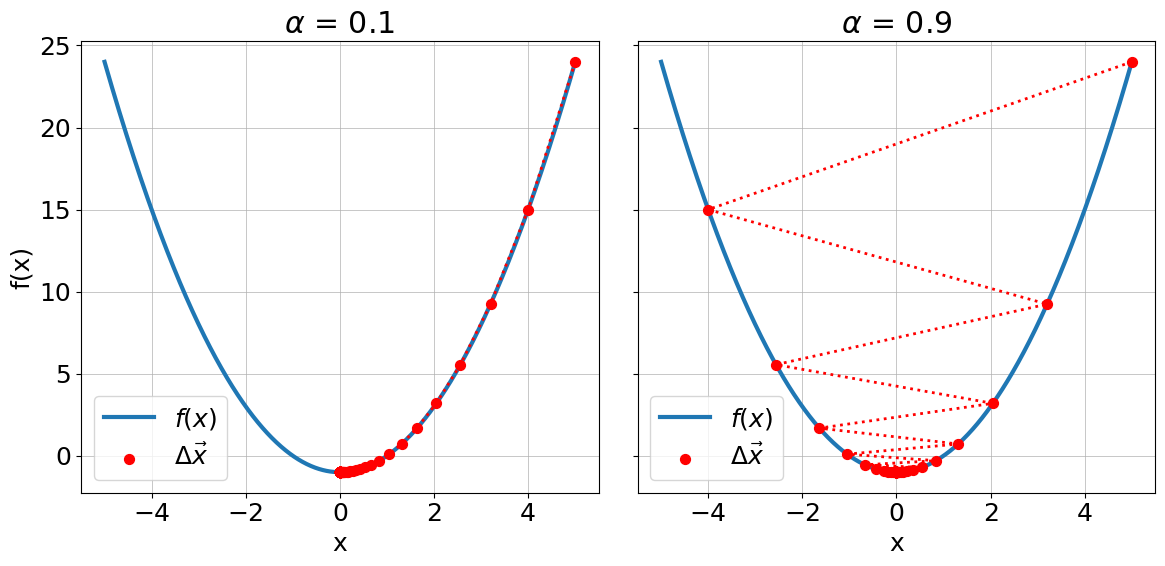

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, alpha in enumerate(alphas):
    steps = steps_dict[alpha]
    fx_steps = [funcao(i)[0] for i in steps]

    axs[i].plot(x1, y1, lw=3, label=r'$f(x)$')
    axs[i].plot(steps, fx_steps, c='r', ls=':', lw=2)
    axs[i].scatter(steps, fx_steps, c='r', marker='o', s=50, label=r'$\Delta\vec{x}$', zorder=99)
    axs[i].set_title(fr'$\alpha$ = {alpha}')
    axs[i].set_xlabel('x')
    axs[i].grid(lw=0.5)
    axs[i].legend()

    # Exibit the minimum point
    x_min = steps[-1]
    y_min = funcao(x_min)[0]
    print(f"[alpha={alpha}] Estimated minimum: (x_min, y_min) = ({x_min:.4f}, {y_min:.4f})")

axs[0].set_ylabel('f(x)')
plt.tight_layout()
plt.show()

É possível observar que conforme $\alpha$ aumenta, o gráfico dos passos oscila mimetizando um oscilador harmônico com resistência, até o momento em que o cálculo do algorítmo converge para o mínimo em (0, -1).

# Exercício 2

Repita o exercício 1 para a função $U(x) = x^2 (x-1)(x+1)$. Esta função tem dois mínimos globais. Use $x_ {0} = 2$ e tente ajustar $\alpha$ para tentar fazer o código convergir ora num mínimo, ora no outro. O que acontece? O que você pode concluir sobre a escolha da taxa de aprendizado $\alpha$?

In [5]:
def funcao2(x, h=1e-10):
    f = x**2 * (x - 1) * (x + 1)   
    df = ( ((x + h)**2 * ((x + h) - 1) * ((x + h) + 1)) - (x**2 * (x - 1) * (x + 1)) ) / h
    return f, df

In [6]:
x2 = np.linspace(-2, 2, 1000)    
y2 = np.array([funcao2(i)[0] for i in x2])  

alphas = [0.12, 0.01]    
x_0 = 2         
steps = [x_0]   
n = 100         

steps_dict = {}
for alpha in alphas:
    x_current = x_0
    steps = [x_current]
    for _ in range(n):
        _, grad = funcao2(x_current)
        x_current += -alpha * grad
        steps.append(x_current)
    steps_dict[alpha] = steps

[alpha=0.12] Estimated minimum: (x_min, y_min) = (-0.7071, -0.2500)
[alpha=0.01] Estimated minimum: (x_min, y_min) = (0.7120, -0.2500)


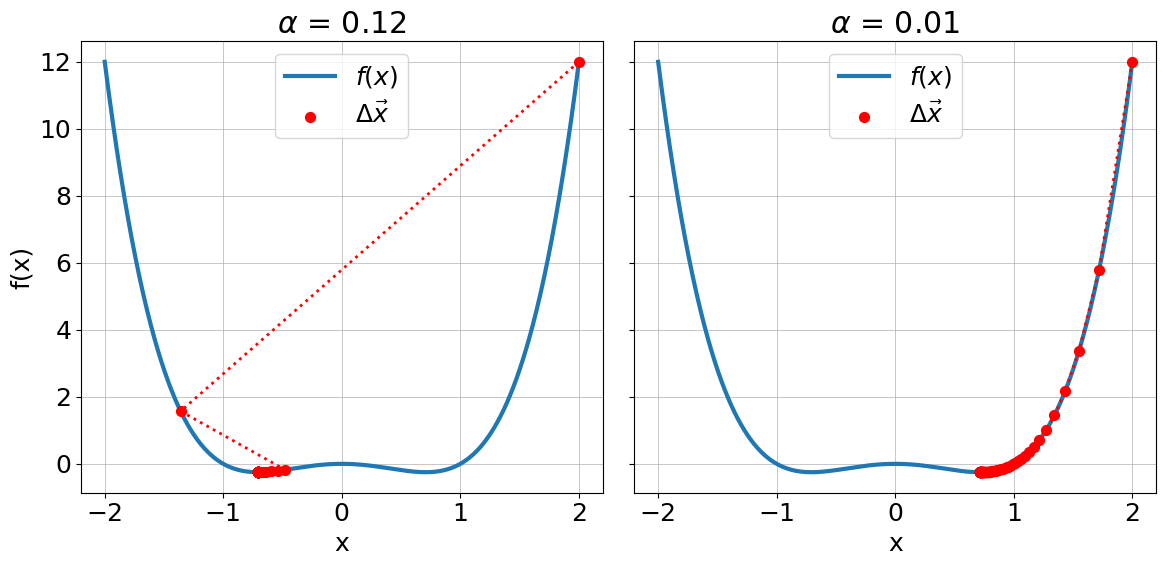

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, alpha in enumerate(alphas):
    steps = steps_dict[alpha]
    fx_steps = [funcao2(i)[0] for i in steps]

    axs[i].plot(x2, y2, lw=3, label=r'$f(x)$')
    axs[i].plot(steps, fx_steps, c='r', ls=':', lw=2)
    axs[i].scatter(steps, fx_steps, c='r', marker='o', s=50, label=r'$\Delta\vec{x}$', zorder=99)
    axs[i].set_title(fr'$\alpha$ = {alpha}')
    axs[i].set_xlabel('x')
    axs[i].grid(lw=0.5)
    axs[i].legend()

    x_min = steps[-1]
    y_min = funcao2(x_min)[0]
    print(f"[alpha={alpha}] Estimated minimum: (x_min, y_min) = ({x_min:.4f}, {y_min:.4f})")

axs[0].set_ylabel('f(x)')
plt.tight_layout()
plt.show()

É possível observar que o algoritmo converge para o mínimo local de acordo com o parâmetro $\alpha$ Essa função possui dois mínimos simétricos, e tais são encontrados de acordo com a escolha do fator de aprendizagem. Portanto, é importante escolher cuidadosamente os parâmetros do algoritmo e considerar a possibilidade de múltiplos pontos de mínimo.

# Exercício 3

Repita o exercício 2, mas agora vamos manipular a altura dos mínimos somando uma reta em $U(x)$, tal que a função agora é $U(x) = x^2 (x-1)(x+1) + x/4$. O que acontece? O que você pode concluir sobre a escolha da taxa de aprendizado $\alpha$?

In [8]:
def funcao3(x, h=1e-10):
    f = x**2 * (x - 1) * (x + 1) + x/4 
    df = ( ((x + h)**2 * ((x + h) - 1) * ((x + h) + 1) + (x + h)/4) - (x**2 * (x - 1) * (x + 1) + x/4) ) / h
    return f, df

In [9]:
x3 = np.linspace(-2, 2, 1000)    
y3 = np.array([funcao3(i)[0] for i in x3])  

alphas = [0.12, 0.01]    
x_0 = 2         
steps = [x_0]   
n = 100         

steps_dict = {}
for alpha in alphas:
    x_current = x_0
    steps = [x_current]
    for _ in range(n):
        _, grad = funcao3(x_current)
        x_current += -alpha * grad
        steps.append(x_current)
    steps_dict[alpha] = steps

[alpha=0.12] Estimated minimum: (x_min, y_min) = (-0.7628, -0.4340)
[alpha=0.01] Estimated minimum: (x_min, y_min) = (0.6481, -0.0816)


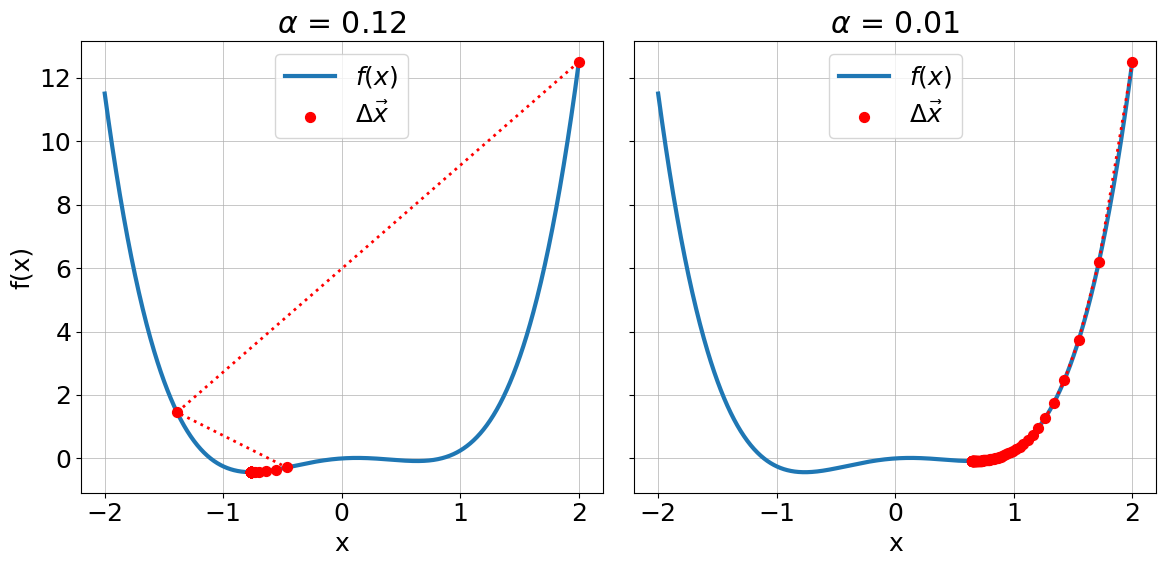

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, alpha in enumerate(alphas):
    steps = steps_dict[alpha]
    fx_steps = [funcao3(i)[0] for i in steps]

    axs[i].plot(x3, y3, lw=3, label=r'$f(x)$')
    axs[i].plot(steps, fx_steps, c='r', ls=':', lw=2)
    axs[i].scatter(steps, fx_steps, c='r', marker='o', s=50, label=r'$\Delta\vec{x}$', zorder=99)
    axs[i].set_title(fr'$\alpha$ = {alpha}')
    axs[i].set_xlabel('x')
    axs[i].grid(lw=0.5)
    axs[i].legend()

    x_min = steps[-1]
    y_min = funcao3(x_min)[0]
    print(f"[alpha={alpha}] Estimated minimum: (x_min, y_min) = ({x_min:.4f}, {y_min:.4f})")

axs[0].set_ylabel('f(x)')
plt.tight_layout()
plt.show()

Agora, temos dois mínimos, sendo um deles o global. Da masma forma que no Exercício 3, a escolha do ponto inicial e da taxa de aprendizagem $\alpha$ interferem diretamente na convergência dos mínimos.

# Exercício 4

Considere agora uma função bidimensional $U(\vec{r}) = U(x,y) = \sin(x)\cos(y) + 2 (xy)^2/1000$. A função tem multiplos mínimos locais. A vizualiação 3D dos passos neste caso pode ser dificil de interpretar. Então, neste caso, para acompanhar a evolução do algoritmo, faça dois gráficos:

- a. Um gráfico de contorno (use `plt.imshow` ou `plt.pcolormesh`) da função $U(x,y)$ e desenhe a trajetória da partícula no gráfico.

- b. Faça um gráfico do valor de $U(x_ {n}, r_ {n})$ a cada passo como função das iterações (passos) $n$. No contexto de redes neurais chamaremos estes passos de **epochs**.

Varie a posição inicial $(x_ {0}, y_ {0})$ e a taxa de aprendizado $\alpha$ e veja como isso afeta a convergência do algoritmo. O que acontece se você aumentar muito a taxa de aprendizado? E se você diminuir muito? Você consegue atingir o mínimo global?

In [11]:
# Define the 2D function and its gradient
# f(x, y) = sin(x) * cos(y) + 2 * (x * y)**2 / 1000
def f(x, y):
    return np.sin(x) * np.cos(y) + 2 * (x * y)**2 / 1000

x_vals = np.linspace(-5, 5, 1000)
y_vals = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)


# Get the gradient of f at a point (x, y)
# ∂ₓf(x, y) = cos(x) * cos(y) + 2 * (x * y) / 1000
# ∂ᵧf(x, y) = -sin(x) * sin(y) + 2 * (x**2) / 1000
def grad_f(x, y, h=1e-10):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

In [42]:
# Parameters for gradient descent
params = [
    {"alpha": 4.0, "x0": -1, "y0": 2.5},  # First set of parameters
    {"alpha": 0.5, "x0": 3, "y0": -2},    # Second set of parameters
]

steps_dict = {}

# Gradient descent algorithm for each set of parameters
for param in params:
    alpha = param["alpha"]
    x0, y0 = param["x0"], param["y0"]
    steps = [(x0, y0)]
    for _ in range(n):
        grad = grad_f(x0, y0)
        x0 -= alpha * grad[0]
        y0 -= alpha * grad[1]
        steps.append((x0, y0))
    steps_dict[fr"$\alpha$={alpha}"] = np.array(steps)

$\alpha$=4.0: Minimum found at (x_min, y_min) = (-2.7159, 1.3218)
$\alpha$=0.5: Minimum found at (x_min, y_min) = (1.5121, -3.1131)


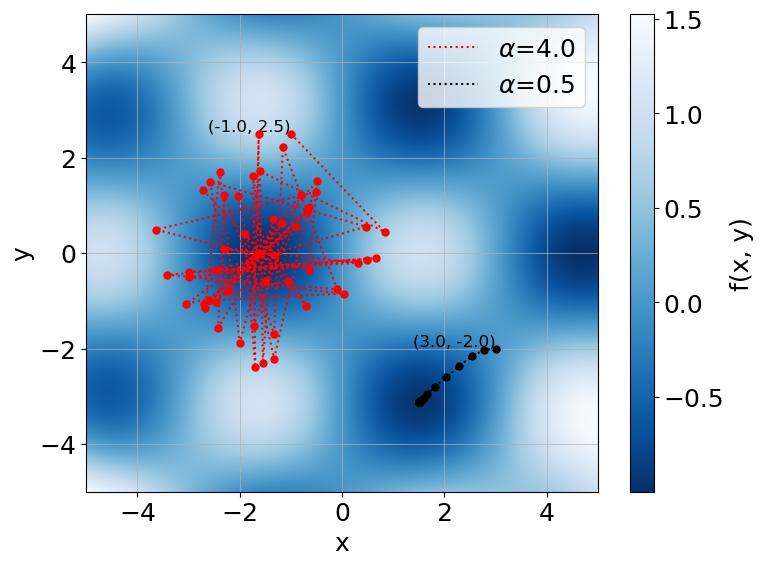

In [53]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.imshow(Z, 
                extent=[x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()],
                origin="lower", 
                cmap="Blues_r", 
                aspect="auto",
                interpolation="bicubic")

colors = ['r', 'k']  # Define a list of colors for each trajectory

for idx, (label, steps) in enumerate(steps_dict.items()):
    color = colors[idx % len(colors)]  # Cycle through the colors if there are more trajectories than colors
    ax.plot(steps[:, 0], steps[:, 1], ls=':', lw=1.5, label=label, color=color)
    ax.scatter(steps[:, 0], steps[:, 1], marker='o', s=25, zorder=99, color=color)

# Ininicial point
for label, steps in steps_dict.items():
    x0, y0 = steps[0]
    ax.text(x0, y0, f"({x0:.1f}, {y0:.1f})", fontsize=12, ha="right", va="bottom")

# Color bar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("f(x, y)")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(lw=0.5)

for label, steps in steps_dict.items():
    x_min, y_min = steps[-1]
    print(f"{label}: Minimum found at (x_min, y_min) = ({x_min:.4f}, {y_min:.4f})")

plt.tight_layout()
plt.show()

Aumentar muito a taxa de aprendizado pode fazer com que o algoritmo de descida do gradiente converja para o mínimo de forma mais demorada, pois os passos são muito grandes, como é possível observar no plot em vermelho do gráfico acima. Diminuir muito pode fazer com que a trajetória para encontrar os mínimos seja mais rápida e eficiente (plot em preto).
No caso do mínimo global, dentro dos limites propostos, não é possível de encontrar para apenas uma escolha de ponto inicial e $\alpha$.